In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
plt.rcParams.update({"font.size":18,
                    "figure.figsize":(18,7)})

In [2]:
def load_data(name, x="TIME", y="CH1", x_new="t",y_new="V"):
    p="cuadraturas"
    data=pd.read_csv("{}.csv".format(name),skiprows=14, usecols=[x, y])
    data.rename(columns={x:x_new,
                        y:y_new}, inplace=True)
    return data

In [3]:
c1_dn=load_data("dark_noise_1").sample(frac=0.3)
c2_dn=load_data("dark_noise_2").sample(frac=0.3)
c1_v=load_data("vacio_1").sample(frac=0.3)
c2_v=load_data("vacio_2").sample(frac=0.3)

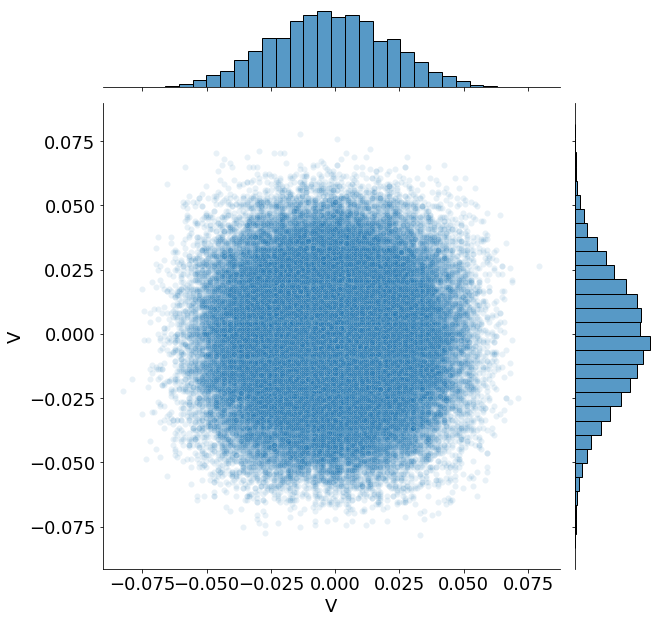

In [4]:
plt.rcParams.update({"font.size":18,
                    "figure.figsize":(18,7)})
ax=sns.jointplot(x=c1_dn["V"], y=c2_dn["V"], height=9,
              marginal_kws=dict(bins=30),
              joint_kws=dict(alpha=0.1))
values=[-80e-3,-40e-3,0,40e-3,80e-3]
#labels=["-80","-40","0","40","80]
#plt.xticks(values,labels)
#plt.yticks(values,labels)
plt.show()

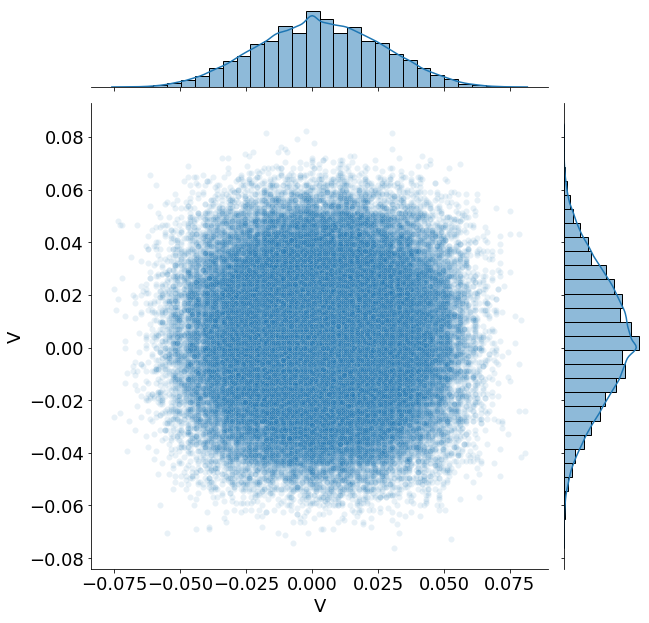

In [5]:
plt.rcParams.update({"font.size":18,
                    "figure.figsize":(18,7)})
ax=sns.jointplot(x=c1_v["V"], y=c2_v["V"], height=9,
              marginal_kws=dict(bins=30, kde=True),
              joint_kws=dict(alpha=0.1))
values=[-80e-3,-40e-3,0,40e-3,80e-3]
#labels=["-80","-40","0","40","80]
#plt.xticks(values,labels)
#plt.yticks(values,labels)
plt.show()

In [6]:
c1_dn["Tipo"]=["Dark noise"]*len(c1_dn)
c2_dn["Tipo"]=["Dark noise"]*len(c1_dn)
c1_v["Tipo"]=["Vacío"]*len(c1_dn)
c2_v["Tipo"]=["Vacío"]*len(c1_dn)
frames1=[c1_dn, c1_v]
frames2=[c2_dn, c2_v]
c1=pd.concat(frames1, sort=False)
c1.reset_index(drop=True, inplace=True)
c2=pd.concat(frames2, sort=False)
c2.reset_index(drop=True, inplace=True)


In [7]:
cuadraturas=pd.DataFrame({"X":c1["V"],
                          "Y":c2["V"],
                          "Tipo":c1["Tipo"]})

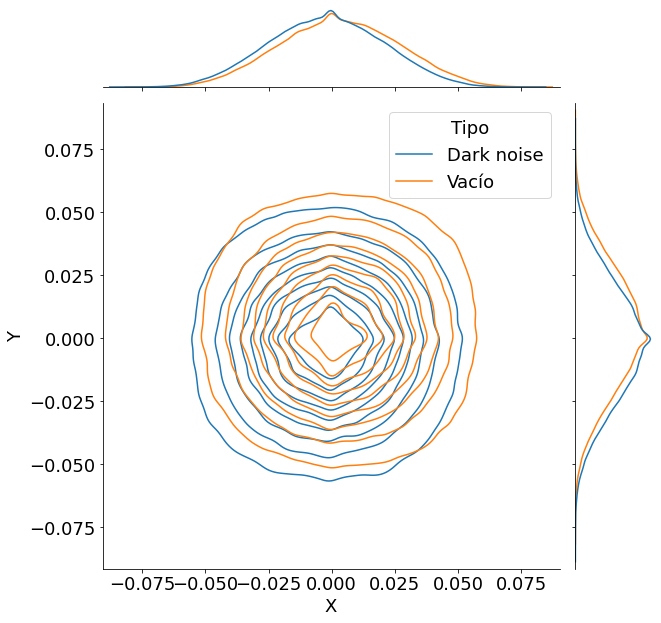

In [8]:
sns.jointplot(data=cuadraturas, x="X", y="Y", height=9, hue="Tipo", kind="kde")
plt.show()